# Introduction to TINKER

Guido Raos, Politecnico di Milano, May 2025 (guido.raos@polimi.it)

![Tinker](https://dasher.wustl.edu/tinker/mechanic.gif)

TINKER is a molecular modeling package, implementing a wide range of computational methods, including energy minimization, molecular dynamics and Monte Carlo simulations. It is a free and open-source code, with contributions from many computational scientists. Its originator and main author is Jay Ponder, from Washington University in Saint Louis (USA). It can be downloaded from: https://dasher.wustl.edu/tinker/. 

Tinker is mainly tageted toward force-field based simulations of biomolecules and organic materials (e.g., polymers, molecular crystals, liquids). There are many other codes, with different characteristics:  see this list of [software_for_molecular_mechanics_modeling](https://en.wikipedia.org/wiki/Comparison_of_software_for_molecular_mechanics_modeling) on Wikipedia. For example, I also use LAMMPS in my research (to be introduced in a separate tutorial).

WARNING: some of the examples below may need to be changed/adapted when new versions of Tinker come out (roughly once a year).  

## TINKER Installation

Download the "Tinker Package Distribution" from the web site (see above). Unpack the file (zip or gzip) in a convenient directory (for example, `C:\tinker`).

The `source` sub-directory (of `C:\tinker`) contains the complete Fortran code. This must to be compiled and linked on your computer, in order to produce the executable programs. We can avoid the compilation by downloading the "Tinker Executables for XXX", where XXX is your operating system (Linux, macOS or Windows). Unpack the executables inside the `bin` sub-directory (of `C:\tinker`). To complete the installation, add this sub-directory to the `PATH` environment variable on your computer. This ensures that the executables can be found and executed from any directory, without typing the whole path (e.g., `%> minimize` instead of `%> C:\tinker\bin\minimize`, where `%>` is the OS prompt).

Other useful sub-directories in the distribution are `doc` (containing the documentation, including a pdf file with the Tinker manual), `params` (containing the parameter files for many force fields), and `example` (examples).

## Using TINKER

TINKER is not a "monolythic" code. It is a collection of many separate program, to perform different tasks. The full list of available programs can be obtained by listing the files within the `bin` sub-directory. Some of these perform some actual simulations, whereas other are utility programs for pre- and post-processing of the simulations. They are also listed (with a succint description of what they do) in the "POTENTIAL ENERGY PROGRAMS" and the "ANALYSIS & UTILITY PROGRAMS & SCRIPTS" sections of the User Manual.

For example, to perform an energy minimization, type:
```
%> minimize
```
The program will start and ask several questions (e.g., the name of the file containing the coordinates of the atoms, the force field file to be used, the minimization method to be used, the convergence criterion, etc.).

Many of these questions can be bypassed/avoided by:
* pre-answering some or all of these questions, by including additional parameters on the command line, for example:
```
%> minimize my_molecule.xyz
```
* including within the same directory a "key" file, with name `my_molecule.key` or `tinker.key` (default file name, if the former is absent).

It is better to avoid working within the Tinker installation directory, to avoid corrupting it in case of mistakes (for example). Instead, we will create a separate directory for every new project, that may contain additional sub-directories for individual simulations. We will "populate" these directories using the files within the `example` sub-directory.

## A simple force field parameter file

This file (`Simple.prm`) can be used to perform some basic simulations involving water and/or argon, and (if necessary) as a template for more complicated systems:

```
##  A simple parameter file  ##

#group-molecule

vdwtype                 LENNARD-JONES
radiusrule              GEOMETRIC
radiustype              SIGMA
radiussize              DIAMETER
epsilonrule             GEOMETRIC
dielectric              1.0

cutoff           12.0
taper             9.0
neutral-groups

atom             1    O    "TIP3P Water O"     8     15.995     2
atom             2    H    "TIP3P Water H"     1      1.008     1
atom             3    Ar   "Argon LJ"         18     39.948     0

bond             1    2           600.00       0.9572
angle            2    1    2       75.00       104.52

vdw              1            3.150656111     0.152072595
vdw              2                  0.000       0.0000
vdw              3                  3.405       0.2379

charge           1                 -0.834
charge           2                  0.417
```

## Example 1:  Argon clusters (again!)

We start again for the minimization of a small argon cluster.

Here is a basic `Argon5.xyz` file that describes our starting system:
```
5  -   A small cluster of argon atoms
1  Ar     0.000000    0.000000    0.000000     186
2  Ar     -1.00000    -1.00000     +1.00000     186
3  Ar     -1.00000    +1.00000     -1.00000     186
4  Ar     +1.00000    +1.00000     +1.00000     186
5  Ar     +1.00000    -1.00000     -1.00000     186
```
The first line gives the numer of atoms in our system, and a title.
Next there is a line for the x, y, z coordinates of each atom (Tinker can work also with internal coordinates, using a Z-matrix). The last numer of each line (186) specifies the "type" the atom, in order to associate with it the correct force field parameters. We will use a modified version OPLS-AA force field (by W. L. Jorgensen and his group), whose parameters are contained within the `oplsaal.prm` (within the `params` directory).

We then do:
```
%> minimize Argon5.xyz
```
answer a couple of "questions" by the program, and wait for the conclusion of the calculation (it won't take long).

Questions:
* what are the initial and final values of the energy?
* what is the structure of the minimized cluster? Tinker produces an `Argon5.xyz_2` file (or more generally `Argon5.xyz_n`, where `n` is an increasing integer), that can be visualized with VMD.
* do the final structure and energy of the cluster correspond to those identified by [Wales and Doye](https://pubs.acs.org/doi/10.1021/jp970984n) for Lennard-Jones clusters? You will have to look up the values of $\epsilon_{LJ}$ for argon inside the force field file, in order to compare the energies.

A structure can be analyzed/checked in considerable detail by running:
```
%> analyze Argon5.xyz_2
```
and following the instructions. We can avoid re-typing the force field file each time, by preparing an `Argon5.key` file containing a single line:
```
parameters    C:\tinker\params\oplsaal.prm
```


**Note:** the `example` sub-directory conntains also `lj38.xyz` and `lj38.key` files, for the global minimum of the LJ-38 cluster (see again the Wales-Doye paper and the previous lecture on Lennard-Jones cluster). Notice that "key" files defined the force field using reduced LJ units.

## Example 2: crystalline Argon (FCC or BCC)

Next we want to minimize the structure of crystalline Argon, comparing the energies of the (hypothetical) body-centered (BCC) and face-centered (FCC) crystals. We start from the BCC, leaving the FCC as an exercise.

First, we need a set of atomic coordinates. We give them as "fractional" coordinates, within the `ArgonBCC.frac` file (whose format is very similar to the `*.xyz` file):
```
2  Argon BCC unit cell
     1  Ar     0.000000    0.000000    0.000000     186
     2  Ar     0.500000    0.500000    0.500000     186
```
The fractional coordinates can be converted to ordinary cartesian coordinates using Tinker's CRYSTAL program. This simply multiplicates all coordinates of each atom by the unit cell length `a-axis` (equal to `b-axis` and `c-axis` in the simple case of a cubic unit cell). This parameter is contained, with other information, within the `ArgonBCC.key` file:
```
parameters    C:\tinker-8.11.1\params\oplsaal.prm
vdw-cutoff    12.0
a-axis        3.926
```
As a starting value for `a-axis`, I have used $3.926=\sigma_{Ar}\times2/\sqrt{3}$ (where $\sigma_{Ar}$ is the Lennard-Jones diameter for Ar). Do you understand the reason for this choice?

I have also chosen an explicit cutoff of 12 Angs for the non-bonded interactions. The default value for periodic systems is 9 Angs (see the Tinker manual), which is bit tight (it is less than $3\times\sigma_{Ar}$). Note that by default there is no truncation (cutoff=$\infty$) for non-periodic system (e.g., in the previous example of the argon clusters).

We may then to:
```
%> minimize ArgonBCC.arc
```
There is also a specific minimization program for crystal structures (or periodic systems):
```
%> xtalmin ArgonBCC.arc
```
The second program minimizes the potential energy with respect to both the atoms' coordinates and the lattice parameters.


**Your turn:** Repeat the calculations for the FCC crystal structure and compare the results. 

## Example 3: water

Let us look at the water-related files inside the `example` sub-directory.

For example, we can compare the files for the TIP3P, TIP4P, TIP5P and AMOEBA force fields (`tip3p.xyz/key`,  `tip4p.xyz/key`, `tip5p.xyz/key`, `amoeba.xyz/key`). The latter is a *polarizable* force field for water and proteins, including also multipolar electrostatics.

Using these files, we can easily carry out minimizations of the water dimer and compute its binding energy (roughly equivalent to the energy one hydrogen bond). Because of its importance, this system has been extensively characterized, both theoretically and experimentally:  https://en.wikipedia.org/wiki/Water_dimer


## Some Tinker-based executables that you might want to try

A full list with explanations in the manual. Disclaimer: I have *not* tried all of them!

POTENTIAL ENERGY PROGRAMS:
* ANALYZE (analyze contributions to the total potential energy)
* MINIMIZE, OPTIMIZE, NEWTON (local optimization methods)
* XTALMIN (minimization of crystal structures, both atomic coordinates and lattice parameters)
* MONTE, GAD, PSS, SNIFFER (global optimization methods)
* SADDLE, PATH, CRITICAL (location of saddle points, i.e. transition states)
* ...

ANALYSIS & UTILITY PROGRAMS:
* XYZEDIT
* CRYSTAL
* PDBXYZ and XYZPDB
* INTXYZ and XYZINT
* SUPERPOSE
* ...

Other executables may be used after we have looked at Molecular Dynamics (MD) simulations:
* DYNAMIC (the actual MD simulation program)
* CORRELATE
* RADIAL
* ...


## Modelling of a Helicene Crystal

Studying and using the examples distributed within Tinker is very good as an introduction to many modeling tasks. However, it will not fully prepare for all the difficulties that can arise when attempting to model something else, that has not been already "pre-digested" for you. So let's see what you would have to do in order to simulate some other material, starting from scratch. For this example I have selected a helicene compound.

Helicene are class of condensed aromatic compounds with the shape of a helix. They have some interesting properties, mostly arising from their chirality (right- or left-handed helices).
See Wikipedia:  https://en.wikipedia.org/wiki/Helicene. And this review, for example: https://pubs.acs.org/doi/10.1021/cr200087r

![A picture](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Hexahelicene-from-xtal-3D-vdW.png/330px-Hexahelicene-from-xtal-3D-vdW.png)

Note that while a helical molecule is always chiral, a material (e.g. crystal) made up of such molecules may be achiral, it it contains an equal amount of left- and right-handed helices.

Suppose we want to model the structure and interactions within a **4-helicene crystal**. This is the smallest possible helicene (phenantrene has just three rings, and it is perfectly planar). Here is 2D representation of the molecule:

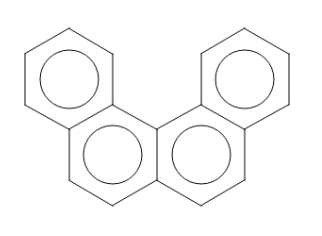

This is the actual three-dimensional structure of the molecule, showing that it is indeed non-planar and slightly helical:

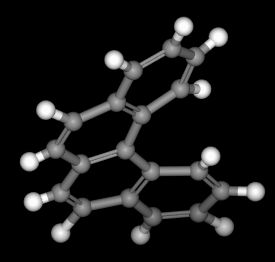

And here is a representation of its experimental crystal structure, showing how the molecules pack together within a unit cell.  
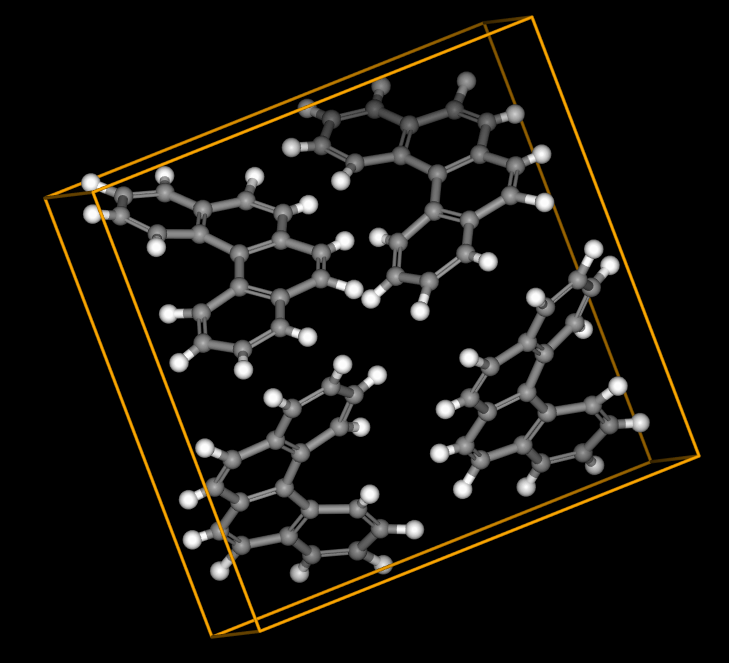

**QUESTION:** can you see from the picture whether the four molecules have the same helical sense, or two opposite senses?  In other words, is the material (not the individual molecules) chiral or non-chiral?

**Here is a summary of some basics modelling steps, using Tinker.**

1. Download the crystal structure with the "BZPHAN" code from the **Cambridge Crystal Structure Database (CSD)**: https://www.ccdc.cam.ac.uk/structures/? This crystal structure was solved by some crystallographers years ago, and then deposited to the CSD.  The CSD has a graphical interface that allows you to check that the structure is indeed the one that you want. The CSD currently stores over 1.000.000 crystal structures, each with a unique 6-letter code.
3. Open the crystallographic information file that you have downloaded ("BZPHAN.cif") with a text editor. You should be able to identify the information about the lattice parameters ($a$, $b$, $c$, $\alpha$, $\beta$ and $\gamma$) and the space group. Note in particular that the [space group](http://img.chem.ucl.ac.uk/sgp/mainmenu.htm) is "P212121" (or, better, $P2_12_12_1$; see also [here](https://oqmd.org/analysis/spacegroup/19)). This space group is orthorhombic (i.e., $\alpha=\beta=\gamma=90^\circ$) and contains three $2_1$ "screw axes", but no inversion centres or symmetry planes ("improper rotations", which would convert a right-handed object into a left-handed one, or viceversa). It is the [most frequently seen](https://structuralbioinformatician.wordpress.com/2014/01/19/p212121-the-most-frequently-seen-space-group-in-protein-crystals/) space group in protein crystals. Since the "asymmetric unit" of the crystal contains a single helical molecule, and the space group operations do not contain any improper rotations, all the molecules have the same chirality (this answers the previous QUESTION). 
4. The crystallographic information file ("BZPHAN.cif") must be converted to a Tinker-style xyz file. This can be done using a number of program, such as **OpenBabel**:  https://www.cheminfo.org/Chemistry/Cheminformatics/FormatConverter/index.html
5. Save, open and inspect the xyz file produced at the previous step ("BZPHAN.xyz"). Note that this file does not contain the full information of the cif file. For example, the unit cell and space group information are missing. This will have to be supplied to Tinker in some other way, afterwards.
6. Note also that, during the conversion, OpenBabel has attached to each atom a number/code that describes the atom type within one of Tinker's force fields (e.g., types 5 and 2 from Allinger's MM2, defined in `mm2.prm`). These choices (of the force field and of the atom types) have a important effect on the outcome of any simulation, so it very important to check and change them, if necessary. For comparison, we are going to do the simulations using both MM2 and OPLS-AA.
7. Look at the xyz file also with VMD (remember to select "Tinker" from VMD's "file type" drop-down menu, otherwise "Automatically" won't work). Note down which C atoms are bonded to H, and which are not.
8. Optimize the structure of the molecule (e.g., with "minimize BZPHAN.xyz" command) and compare the result with the starting structure. For example, is the molecule still helical? In other words, is the force field good enough? To compare the starting and final structures, you can try to use Tinker's "superpose" program, or just display them on top of each other with VMD.
9. Make another copy of the xyz file (e.g., "BZPHAN-oplsaa.xyz"), and edit it to change the force field. For example, using the latest (2008) version of the OPLS-AA force field (defined in `oplsaa08.prm`). Open the oplsaa08.prm file, and find the atom type numbers that are suitable to describe "Aromatic C", "Aromatic H-C" and "Biphenyl C1" (for the C's non bonded to H). The main difference between "Aromatic C" and "Biphenyl C1" is that the first one is charged (-0.115, exactly balancing +0.115 of "Aromatic H-C") whereas the other is not. Edit the xyz file to inset these atom type number at the correct positions.
10. Prepare a Tinker key file which will contain further information that is necessary for any simulation or manupulation or analysis ("BZPHAN-oplsaa.key" or "Tinker.key"). We will use the OPLSAA force field, so one line in this file should contain "parameters  C:\tinker-25.1\params\oplsaa08" (you may have to change to directory name).
11. Re-optimize the structure of the molecules using the new force field. Is OPLS-AA better or worse that MM2?
12. At the previous step, the program will complain about some missing parameters, for some types of bond angles and torsions (e.g., between three or four consecutive "Biphenyl C1"). These parameters can be added manually to the *.key file, "borrowing" them from analogous angles and torsions inside `oplsaa08.prm`.
13. Proceed to model the 4-Helicene crystal, using both MM2 and OPLS-AA. To do this, you will have to edit the *.key files to add information about the unit cell parameters and the space group, generate the full unit cell from the asymmetric unit (using one option of the CRYSTAL program), and to minimize the crystal structure (with the MINIMIZE and/or XTALMIN programs).
14. Observe the optimized crystal structures and compare them to the starting experimental structure. Are they close enough? Is one force field performing better than the other? 
15. If you want, you could also go on to do and perform **molecular dynamics (MD)** simulations of the same crystals, using Tinker's DYNAMIC program. This would allow you to simulate the effect of temperature, for example. I would advice you to run the MD simulations not on a single unit cell, but on a supercell containg multiple unit cell (e.g., 2x2x5, or 3x3x8, or whatever you can afford to simulate). To generate such a supercell, use again Tinker's CRYSTAL program.
16. Good luck, I hope you have fun!
17. ...

To help you follow the previous discussion, or if you get stuck, here is my `BZPHAN-oplsaa.xyz` file (see step 9. above):
```
    30 Benzo(c)phenanthrene      OPLS-AA 2008 parameters
     1  C      5.415404    2.017373    0.873535     90    11    16    19
     2  C      1.992294    3.549160    1.226420     460   15    18     8
     3  C      5.405142    4.620845    2.422758     90    28     9     4
     4  C      5.934368    5.420715    3.411993     90     3    29     5
     5  C      5.107544    5.977085    4.400650     90     4     6    30
     6  C      3.760290    5.787382    4.327758     90    10     5    20
     7  C      1.747472    4.949287    3.166130     90     8    10    21
     8  C      1.194790    4.307975    2.138714     90     2    22     7
     9  C      4.002180    4.320716    2.376478     460   18     3    10
    10  C      3.179754    5.018656    3.325218     460    9     7     6
    11  C      6.070706    1.152380    0.024876     90    12    23     1
    12  C      5.463782    0.710681   -1.172619     90    24    13    11
    13  C      4.160508    1.097168   -1.434102     90    25    12    17
    14  C      2.062662    2.184425   -0.782132     90    26    17    15
    15  C      1.357516    2.896522    0.124377     90    14    27     2
    16  C      4.113596    2.514283    0.565194     460   17     1    18
    17  C      3.467090    1.936678   -0.566930     460   13    14    16
    18  C      3.390858    3.459971    1.398235     460   16     2     9
    19  H      5.761380    2.335905    1.545173     91     1
    20  H      3.194414    6.328179    4.837996     91     6
    21  H      0.995414    5.597678    3.516123     91     7
    22  H      0.337180    4.234359    1.981941     91     8
    23  H      6.951772    0.770141    0.398587     91    11
    24  H      6.161598    0.007078   -1.584511     91    12
    25  H      3.792542    0.669626   -2.194829     91    13
    26  H      1.347254    1.659200   -1.571206     91    14
    27  H      0.496974    2.941825    0.026611     91    15
    28  H      6.187986    4.326379    1.732029     91     3
    29  H      6.837424    5.703855    3.369763     91     4
    30  H      5.498966    6.506557    5.168319     91     5
```

And here is my `BZPHAN-oplsaa.key` file (see steps 10., 12. and 13., above):
```
# Force field selection
parameters  C:\tinker-25.1\params\oplsaa08

# Additional force field parameters
angle        86   86   86      63.00     120.00
torsion      86   86   86   86      0.000 0.0 1   7.250 180.0 2   0.000 0.0 3
torsion      48   86   86   86      0.000 0.0 1   7.250 180.0 2   0.000 0.0 3
torsion      48   86   86   48      0.000 0.0 1   7.250 180.0 2   0.000 0.0 3

# Crystal lattice and space group (comment out using "#" for single-molecule calculations)
a-axis  14.660
b-axis  14.157
c-axis   5.785
spacegroup P212121

# Options for the calculation of non-bonded interactions (for periodic systems)
cutoff 12.
ewald

```

